##**Dataset**

Kaggle - https://www.kaggle.com/datasets/msambare/fer2013

**About Data**

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories

0=Angry,

1=Disgust,

2=Fear,

3=Happy,

4=Neutral,

5=Sad,

6=Surprise




In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 98% 59.0M/60.3M [00:02<00:00, 26.2MB/s]
100% 60.3M/60.3M [00:03<00:00, 20.9MB/s]


In [3]:
!unzip /content/fer2013.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

In [4]:
# Standard library for interacting with the operating system and file system
import os

# Standard library for generating random numbers
import random

# Third-party library for data manipulation and analysis
import pandas as pd

# Third-party library for numerical computations
import numpy as np

# Third-party library for statistical data visualization
import seaborn as sns

# Third-party library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# OpenCV library for computer vision tasks
import cv2

# Python Imaging Library (PIL) fork for opening, manipulating, and saving image files
from PIL import Image

# Standard library for determining image types
import imghdr

# Scikit-learn module for calculating evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Scikit-learn module for computing class weights
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow Keras modules for building and training neural networks
from tensorflow.keras import layers, models, regularizers, optimizers

# Pre-trained models for image classification in TensorFlow Keras
from tensorflow.keras.applications import VGG16, ResNet50V2

# TensorFlow Keras callbacks for model checkpointing, early stopping, learning rate reduction, TensorBoard, and logging
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger

# TensorFlow Keras layers for building Convolutional Neural Networks (CNNs)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D

# TensorFlow Keras model classes for defining and compiling models
from tensorflow.keras.models import Sequential, Model

# TensorFlow Keras optimizers for model training
from tensorflow.keras.optimizers import Adam, Adamax

# TensorFlow Keras preprocessing utilities for image data augmentation and manipulation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Keras utility for visualizing model architecture
from keras.utils import plot_model

import tensorflow as tf

## **Project Directory Setup for FER 2013 Emotion Detection**

This script sets up the directory structure for the FER 2013 Emotion Detection project. It defines the project name, lists the models to be used, and creates the necessary directories for organizing model-related files.

In [5]:
# Define your project name
project_name = 'FER_2013_Emotion_Detection'

# List your models
model_names = [
    'Custom_CNN_From_Scratch',
    'Custom_CNN_With_Augmentation',
    'VGG16_Transfer_Learning',
    'ResNet50_Transfer_Learning'
]

# Base directory (in this case, your Google Colab workspace)
base_dir = '/content/'

# Create the project directory
project_dir = os.path.join(base_dir, project_name)
os.makedirs(project_dir, exist_ok=True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok=True)
    # Example subdirectories for model-related files
    # os.makedirs(os.path.join(model_dir, 'checkpoints'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'logs'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'saved_models'), exist_ok=True)

print(f'Project directory structure created at: {project_dir}')

Project directory structure created at: /content/FER_2013_Emotion_Detection


## **Image Dataset Cleanup Script (Data Cleaning)**

This script ensures that only acceptable image files (JPEG, JPG, PNG) are retained in the specified directory. It walks through all directories and files within the dataset directory, checks the file types, and removes any files that are not of the specified image formats. Additionally, it handles exceptions by reporting problematic files and removing them if necessary.

In [6]:
# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/train'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

## **Counting Files in Subdirectories (Data Analysis)**

This script defines a function to count the number of files (images) in each subdirectory of a given directory. It returns a DataFrame with these counts, indexed by a specified set name (e.g., 'train' or 'test'). The script then applies this function to both training and testing directories and prints the resulting counts.


In [7]:
# Define a function to count the number of files (assumed to be images for this context) for each subdirectory in a given directory.
# The function returns a DataFrame with these counts, indexed by a specified set name (e.g., 'train' or 'test').
def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/train'
test_dir = '/content/test'

# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)

       happy  disgust   sad  neutral  angry  fear  surprise
train   7215      436  4830     4965   3995  4097      3171
      happy  disgust   sad  neutral  angry  fear  surprise
test   1774      111  1247     1233    958  1024       831


### **Class imbalance**

The output does indicate a class imbalance in the dataset. Class imbalance occurs when the number of instances across different classes in a dataset is not evenly distributed. This can be a problem in machine learning as it can lead to models that are biased towards the more frequent classes, often resulting in poor performance on the less frequent classes.

### Observations

- **Disgust:** This category has the fewest images in both the training (436) and testing (111) sets, indicating a significant underrepresentation.
- **Happy:** This category has the most images in both the training (7215) and testing (1774) sets, indicating overrepresentation.
- **Other Categories:** The counts for `fear`, `angry`, `sad`, `surprise`, and `neutral` are somewhat more balanced but still show variations.

### Implications of Class Imbalance

1. **Model Bias:** The model may become biased towards the `happy` class and perform poorly on the `disgust` class due to the disparity in the number of training examples.
2. **Evaluation Metrics:** Metrics such as accuracy can be misleading. For instance, high accuracy might be achieved by the model predominantly predicting the `happy` class due to its abundance.

### Summary

The given dataset exhibits class imbalance, particularly with the `disgust` class being underrepresented and the `happy` class being overrepresented. Addressing this imbalance is crucial to train a balanced and effective model. Various strategies, including resampling, data augmentation, adjusting class weights, and using ensemble methods, can be employed to mitigate the effects of class imbalance.

<Axes: >

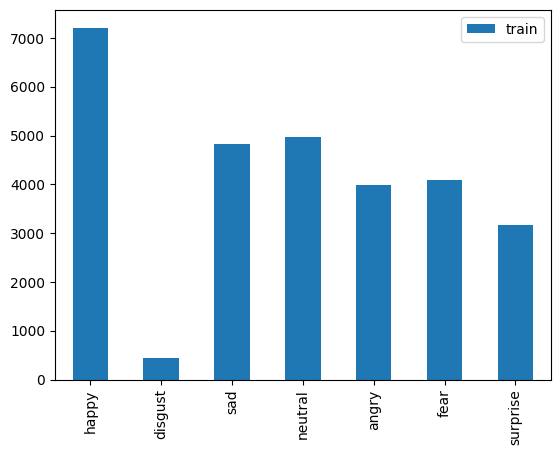

In [8]:
train_count.transpose().plot(kind='bar')

<Axes: >

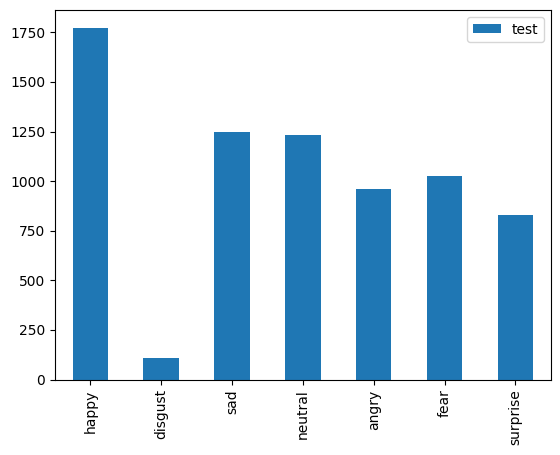

In [9]:
test_count.transpose().plot(kind='bar')

In [10]:
os.listdir(train_dir)

['happy', 'disgust', 'sad', 'neutral', 'angry', 'fear', 'surprise']

In [11]:
folder = os.path.join(train_dir, 'angry')
os.listdir(folder)[40]

'Training_90745717.jpg'

### **Visualizing Sample Images from Each Emotion Category**

This script visualizes a sample image from each subdirectory (representing different emotions) within the training directory. It reads and displays one image per emotion in a 3x4 grid using matplotlib, setting the title of each subplot to the corresponding emotion name.

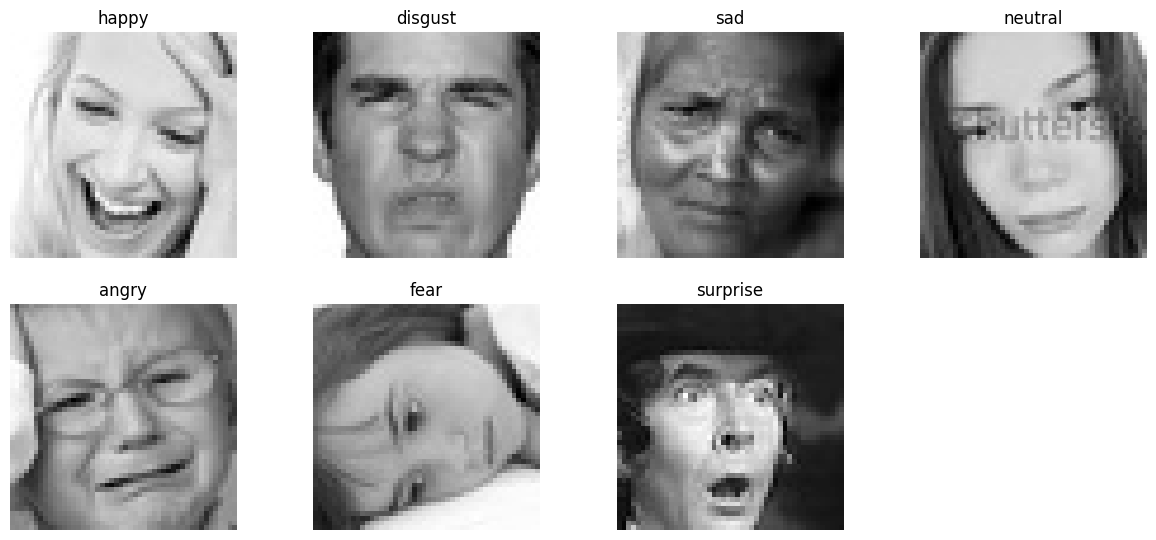

In [12]:
# List all emotion subdirectories in the training directory
emotions = os.listdir(train_dir)

# Create a figure for plotting with a specified size
plt.figure(figsize=(15, 10))

# Loop through each emotion subdirectory and plot an image from each
for i, emotion in enumerate(emotions, 1):  # Start index from 1 for subplot indexing
    # Construct the path to the current emotion folder
    folder = os.path.join(train_dir, emotion)

    # Get the path to the 43rd image in the current folder
    img_path = os.path.join(folder, os.listdir(folder)[40])

    # Read the image
    img = plt.imread(img_path)

    # Create a subplot in a 3x4 grid for each image
    plt.subplot(3, 4, i)

    # Display the image in grayscale
    plt.imshow(img, cmap='gray')

    # Set the title of the subplot to the emotion
    plt.title(emotion)

    # Hide the axis
    plt.axis('off')

# Show the plot
plt.show()

### **Plotting Random Images from a Directory**

This script defines a function to display a grid of random images from a specified directory. The function selects a given number of images, defaults to 9, from the directory, and plots them in a 3x3 grid using matplotlib, setting the title of each subplot to the specified class name.

In [13]:
def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Create a figure for plotting with a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

    # Loop through each selected image file
    for i, image_file in enumerate(selected_images):
        # Construct the full path to the image file
        image_path = os.path.join(directory_path, image_file)

        # Load the image
        image = load_img(image_path)

        # Display the image in the subplot
        axes[i].imshow(image)

        # Set the title of the subplot to the class name
        axes[i].set_title(f"Image: {class_name}")

        # Hide the axis for a cleaner look
        axes[i].axis('off')

    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

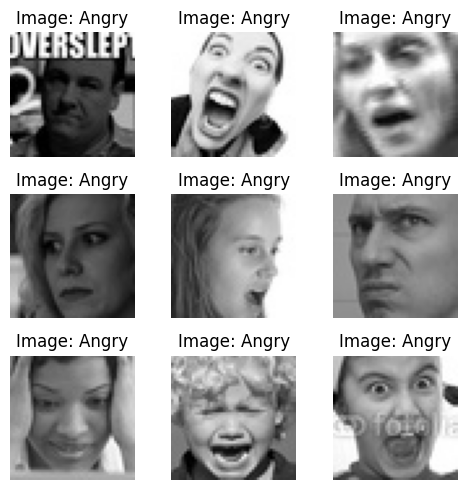

In [14]:
# Placeholder for the directory path
angry_directory_path = '/content/train/angry'  # Replace with your directory path
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

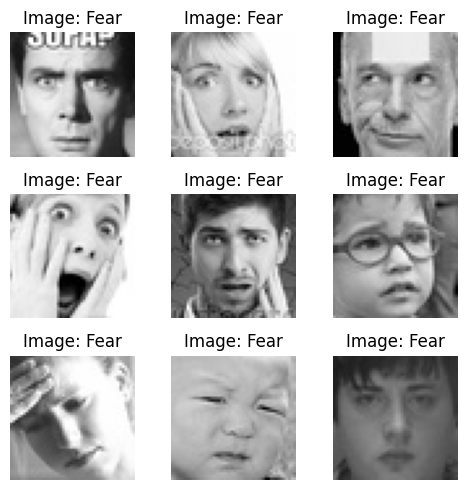

In [15]:
# Placeholder for the directory path
fear_directory_path = '/content/train/fear'  # Replace with your directory path
plot_images_from_directory(fear_directory_path, class_name = 'Fear')

### **Checking shapes and channels.**

In [16]:
image = '/content/train/angry/Training_10118481.jpg'

import cv2

img = cv2.imread(image) # Default load in color format.

# If the image is loaded successfully, print its pixel values
if img is not None:
    # print(img)
    print("Shape:", img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

Shape: (48, 48, 3)


By Default cv2 read images in RGB and if the images are not RGB it creates dummy RGB images thats why output is (48, 48, 3) for our grayscale images

To correctly handle grayscale images with OpenCV and avoid this duplication, we can explicitly specify the flag cv2.IMREAD_GRAYSCALE when reading the images. This flag ensures that grayscale images are read as single-channel images, and thus the shape will be (height, width) (48, 48 )instead of (height, width, 3) (48, 48, 3).

In [17]:
import cv2

image_path = '/content/train/angry/Training_10118481.jpg'

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# If the image is loaded successfully, print its pixel values
if img is not None:
    # print(img)
    print("Shape:", img.shape)  # This should now print (48, 48)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

Shape: (48, 48)


##**Model 1 : Custom CNN from Scratch**

### **Initializing the ImageGenerators**

In [18]:
# Define paths to the train and validation directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'

In [19]:
# Set some parameters
img_width, img_height = 48, 48  # Size of images
batch_size = 64
epochs = 10
num_classes = 7  # Update this based on the number of your classes

#### **Data Preprocessing and Augmentation for Image Classification**

This script sets up data generators to preprocess and augment images for training, validation, and testing. It rescales the pixel values to the [0, 1] interval and automatically retrieves images and their classes for the train, validation, and test sets using `flow_from_directory` method from `ImageDataGenerator` class. It also specifies the target size, batch size, class mode, and color mode for each generator.

In [20]:
# Rescale the pixel values (0-255) to the [0, 1] interval
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    train_data_dir,  # Directory containing training images
    target_size=(img_width, img_height),  # Resizes images to this size
    batch_size=batch_size,  # Size of batches used for training
    class_mode='categorical',  # Type of class labels (categorical in this case)
    color_mode='grayscale',  # Read images in grayscale mode
    subset='training'  # Indicates this is for the training set
)

validation_generator = data_generator.flow_from_directory(
    train_data_dir,  # Directory containing training images (same as above)
    target_size=(img_width, img_height),  # Resizes images to this size (same as above)
    batch_size=batch_size,  # Size of batches used for validation
    class_mode='categorical',  # Type of class labels (categorical in this case)
    color_mode='grayscale',  # Read images in grayscale mode (same as above)
    subset='validation'  # Indicates this is for the validation set
)

test_generator = data_generator.flow_from_directory(
    test_data_dir,  # Directory containing test images
    target_size=(img_width, img_height),  # Resizes images to this size
    batch_size=batch_size,  # Size of batches used for testing
    class_mode='categorical',  # Type of class labels (categorical in this case)
    color_mode='grayscale',  # Read images in grayscale mode
    # subset='validation'  # No subset specified for the test set
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

# Accessing class labels for the validation data
test_class_labels = test_generator.class_indices
print("Validation class labels:", test_class_labels)

Training class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


#### **Convolutional Neural Network (CNN) Architecture Definition**

This script initializes a Sequential model for a CNN. It adds convolutional layers with ReLU activations for feature extraction, followed by BatchNormalization, MaxPooling, and Dropout layers for regularization. It then flattens the output and adds fully connected dense layers with ReLU activations. Finally, it includes an output layer with a softmax activation for classification.


In [22]:
# Initialising the CNN
model = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### Explanation

1. **Initializing the CNN:**
   ```python
   model = Sequential()
   ```
   - `Sequential()` creates a linear stack of layers for building the neural network model.

2. **Adding Convolutional Layers:**
   - Convolutional layers detect features from input images.
   - `Conv2D` layers are 2D convolutional layers.
   - Each `Conv2D` layer is followed by an `Activation` layer to introduce non-linearity to the model.
   - `padding='same'` ensures that the output size is the same as the input size by padding the input if necessary.
   - `kernel_initializer="glorot_uniform"` initializes the weights of the layer according to the Glorot uniform initializer.

3. **Adding Pooling Layers:**
   - `MaxPooling2D` layers reduce the spatial dimensions of the convolutional layers' output.
   - `pool_size=(2, 2)` specifies the size of the pooling window.

4. **Adding Regularization:**
   - Regularization techniques are added to prevent overfitting.
   - `kernel_regularizer=regularizers.l2(0.01)` adds L2 regularization with a regularization parameter of 0.01 to the specified layers.

5. **Adding Batch Normalization:**
   - `BatchNormalization` normalizes the activations of the previous layer.

6. **Adding Dropout:**
   - `Dropout` layers randomly deactivate a fraction of neurons during training to prevent overfitting.
   - `Dropout(0.25)` means 25% of neurons will be randomly deactivated during training.

7. **Flattening and Adding Dense Layers:**
   - `Flatten` layer converts the 2D feature maps into a 1D feature vector.
   - `Dense` layers are fully connected layers.
   - `Dense(1024)` specifies a fully connected layer with 1024 neurons.
   - `Activation('relu')` applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.

8. **Output Layer:**
   - The final `Dense` layer has `num_classes` neurons, representing the number of output classes.
   - `Activation('softmax')` applies the softmax function to produce class probabilities for multi-class classification.

This CNN architecture consists of convolutional layers for feature extraction, pooling layers for spatial downsampling, dropout and batch normalization for regularization, and fully connected layers for classification.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                     

In [24]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

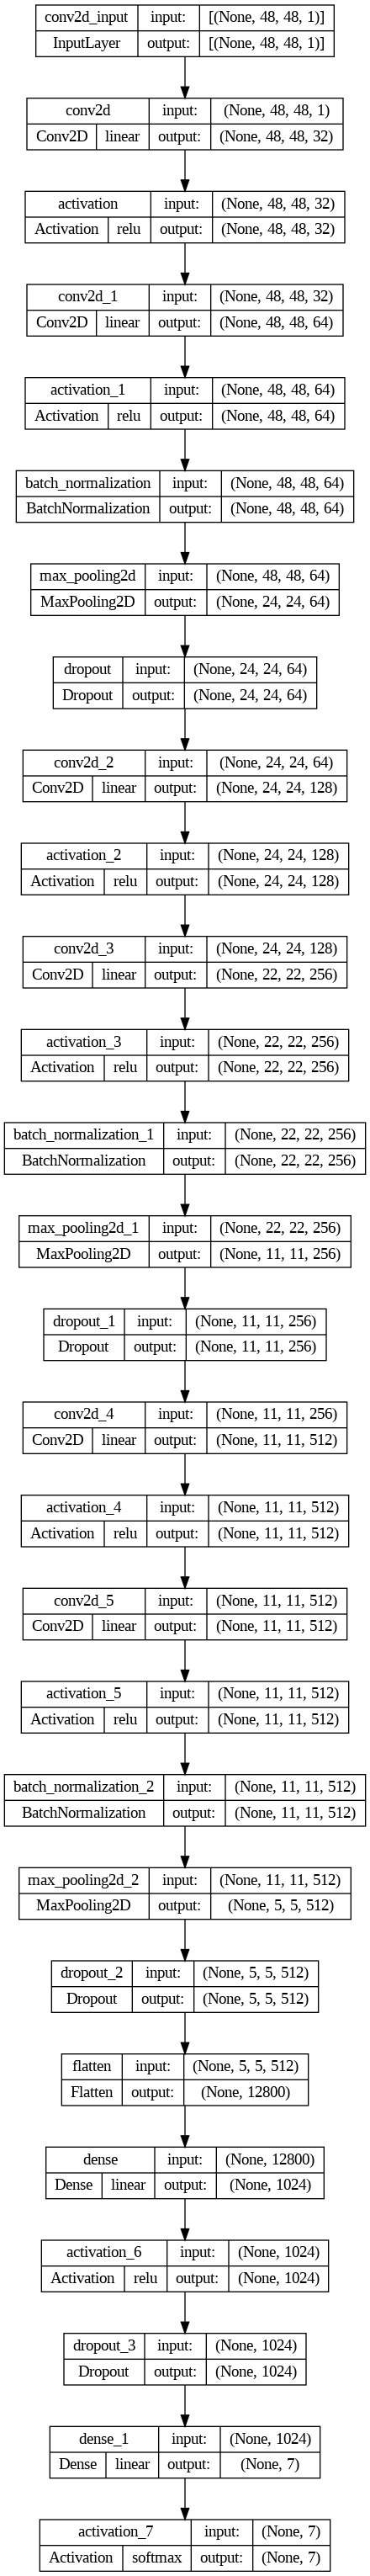

In [25]:
plot_model(model, show_shapes= True, show_layer_names=True, show_layer_activations= True)

### Understanding Callbacks

In Keras, callbacks are special functions that can be applied at different stages of training, such as at the beginning or end of an epoch, batch, or training process. They are useful for monitoring and modifying the behavior of the model during training, enabling features such as early stopping, learning rate adjustment, logging, and saving models. Here's an overview of some commonly used callbacks:

1. **EarlyStopping**: Stops training when a monitored metric has stopped improving.
2. **ModelCheckpoint**: Saves the model after every epoch or when a monitored metric improves.
3. **ReduceLROnPlateau**: Reduces the learning rate when a monitored metric has stopped improving.
4. **TensorBoard**: Provides visualizations for metrics, graphs, and other details in the TensorBoard web interface.
5. **CSVLogger**: Logs epoch results to a CSV file.
6. **LambdaCallback**: Creates custom callbacks from Python functions.

### Detailed Explanation of Some Callbacks

1. **EarlyStopping**
   - Monitors a specific metric (e.g., validation loss).
   - Stops training if the metric stops improving for a defined number of epochs (`patience`).

2. **ModelCheckpoint**
   - Saves the model to a file after every epoch.
   - Can be configured to save only the best model based on a monitored metric.

3. **ReduceLROnPlateau**
   - Reduces the learning rate when a monitored metric has stopped improving.
   - Helps in fine-tuning the learning rate during training.

4. **TensorBoard**
   - Logs data for visualization in TensorBoard.
   - Includes metrics, graphs, and other details.

5. **CSVLogger**
   - Logs training and validation metrics to a CSV file after each epoch.
   - Useful for later analysis.

Using callbacks in Keras can significantly enhance the training process by providing more control and better insights into the model's performance.

In [26]:
# File path for the model checkpoint
cnn_path = '/content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch'
name = 'Custom_CNN_model.keras'
chk_path = os.path.join(cnn_path, name)
chk_path

'/content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras'

#### **`ModelCheckpoint` and its Parameters**

```python
keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)
```

The `ModelCheckpoint` callback in Keras is used to save the model or model weights at specific intervals, based on the performance of a monitored metric. This is particularly useful for saving the best model during training.

Here is the detailed explanation of each parameter in `ModelCheckpoint`:

1. **filepath**
   - **Type:** `str`
   - **Description:** The path where the model or model weights will be saved. The directory will be created if it does not exist. You can include format options in the filename, such as `epoch` and `val_loss`, to save different versions of the model for each epoch.
   - **Example:** `'model_{epoch:02d}-{val_loss:.2f}.h5'`

2. **monitor**
   - **Type:** `str`
   - **Default:** `"val_loss"`
   - **Description:** The metric to monitor. It can be any of the metrics available during training, such as `val_accuracy`, `accuracy`, `loss`, etc.
   - **Example:** `"val_accuracy"`

3. **verbose**
   - **Type:** `int`
   - **Default:** `0`
   - **Description:** Verbosity mode, 0 or 1. If 0, nothing is printed. If 1, messages are printed when the model is saved.
   - **Example:** `1`

4. **save_best_only**
   - **Type:** `bool`
   - **Default:** `False`
   - **Description:** If `True`, the latest best model according to the monitored metric will not be overwritten. Only the model with the best performance will be saved.
   - **Example:** `True`

5. **save_weights_only**
   - **Type:** `bool`
   - **Default:** `False`
   - **Description:** If `True`, only the model's weights will be saved (`model.save_weights(filepath)`), otherwise the full model is saved (`model.save(filepath)`).
   - **Example:** `True`

6. **mode**
   - **Type:** `str`
   - **Default:** `"auto"`
   - **Description:** One of `{"auto", "min", "max"}`. In `min` mode, training will stop when the quantity monitored has stopped decreasing; in `max` mode it will stop when the quantity monitored has stopped increasing; in `auto` mode, the direction is automatically inferred from the name of the monitored quantity.
   - **Example:** `"min"`

7. **save_freq**
   - **Type:** `str` or `int`
   - **Default:** `"epoch"`
   - **Description:** 'epoch' or integer. When set to `'epoch'`, the callback saves the model after each epoch. When set to an integer, the callback saves the model at intervals of `save_freq` batches.
   - **Example:** `5`

8. **initial_value_threshold**
   - **Type:** `float`
   - **Default:** `None`
   - **Description:** If specified, it will only save the model the first time the monitored metric exceeds this value. This can be useful to prevent saving the model at the beginning of training when metrics can be unstable.
   - **Example:** `0.5`

`ModelCheckpoint` is a callback provided by Keras that allows you to save the model (or its weights) to disk at specified intervals. This is extremely useful for:
- **Preventing Loss of Progress:** In case your training process is interrupted, you can resume from the last saved state.
- **Saving Best Model:** By monitoring a specific metric, such as validation loss or accuracy, you can ensure that only the best performing model is saved, avoiding overfitting to later epochs.
- **Flexibility:** It offers flexibility in terms of what to save (full model or weights), when to save (after every epoch or batch), and which metric to monitor to determine the best model.

By using `ModelCheckpoint`, you can enhance the training process by ensuring that the best performing model is always saved, and you have the ability to resume training without losing significant progress in case of interruptions.

In [27]:
# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

#### **EarlyStopping in Keras**
```python
keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
```
The `EarlyStopping` callback in Keras is used to stop training when a monitored metric stops improving. This helps to avoid overfitting by ending training at the optimal point. Here is a simple explanation of each parameter:

1. **monitor**
   - **Type:** `str`
   - **Default:** `"val_loss"`
   - **Description:** The metric to monitor for improvement.
   - **Example:** `"val_accuracy"`

2. **min_delta**
   - **Type:** `float`
   - **Default:** `0`
   - **Description:** The minimum change in the monitored metric to qualify as an improvement.
   - **Example:** `0.01`

3. **patience**
   - **Type:** `int`
   - **Default:** `0`
   - **Description:** Number of epochs with no improvement after which training will be stopped.
   - **Example:** `5`

4. **verbose**
   - **Type:** `int`
   - **Default:** `0`
   - **Description:** Verbosity mode, 0 or 1. If 1, prints messages when training is stopped.
   - **Example:** `1`

5. **mode**
   - **Type:** `str`
   - **Default:** `"auto"`
   - **Description:** One of `{"auto", "min", "max"}`. Determines whether an increase or decrease in the monitored metric is considered an improvement.
   - **Example:** `"min"`

6. **baseline**
   - **Type:** `float`
   - **Default:** `None`
   - **Description:** Baseline value for the monitored metric. Training will stop if the model does not show improvement over this value.
   - **Example:** `0.5`

7. **restore_best_weights**
   - **Type:** `bool`
   - **Default:** `False`
   - **Description:** Whether to restore model weights from the epoch with the best value of the monitored metric.
   - **Example:** `True`

8. **start_from_epoch**
   - **Type:** `int`
   - **Default:** `0`
   - **Description:** Number of epochs to wait before starting to monitor improvement.
   - **Example:** `10`

### Summary

`EarlyStopping` helps to terminate the training process when the model's performance stops improving, thus preventing overfitting and saving time. It monitors a specified metric and stops training if no improvement is seen for a defined number of epochs (`patience`). Optional parameters allow for fine-tuning the behavior, such as restoring the best weights and starting monitoring after a certain epoch.

In [28]:
# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

#### ReduceLROnPlateau in Keras

```python
keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
    **kwargs
)
```

The `ReduceLROnPlateau` callback in Keras reduces the learning rate when a monitored metric stops improving. This helps the model converge more effectively by lowering the learning rate when progress stalls.

1. **monitor**
   - **Description:** The metric to watch for improvement.
   - **Default:** `"val_loss"`

2. **factor**
   - **Description:** Factor by which the learning rate will be reduced. `new_lr = lr * factor`.
   - **Example:** `0.1` reduces the learning rate to 10% of its current value.

3. **patience**
   - **Description:** Number of epochs with no improvement after which the learning rate will be reduced.
   - **Default:** `10`

4. **verbose**
   - **Description:** Verbosity mode, 0 or 1. If 1, prints a message when the learning rate is reduced.
   - **Default:** `0`

5. **mode**
   - **Description:** One of `{"auto", "min", "max"}`. Decides whether to reduce when the metric stops decreasing (`min`) or increasing (`max`).
   - **Default:** `"auto"`

6. **min_delta**
   - **Description:** Minimum change in the monitored metric to qualify as an improvement.
   - **Default:** `0.0001`

7. **cooldown**
   - **Description:** Number of epochs to wait before resuming normal operation after a learning rate reduction.
   - **Default:** `0`

8. **min_lr**
   - **Description:** Lower bound on the learning rate.
   - **Default:** `0.0`

### Summary

`ReduceLROnPlateau` lowers the learning rate when a specified metric stops improving, helping the model to continue learning effectively.

In [29]:
# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

#### CSVLogger

```python
keras.callbacks.CSVLogger(filename, separator=",", append=False)
```
Callback that streams epoch results to a CSV file.

Supports all values that can be represented as a string, including 1D iterables such as np.ndarray.

Arguments

1. filename: Filename of the CSV file, e.g. 'run/log.csv'.
2. separator: String used to separate elements in the CSV file.
3. append: Boolean. True: append if file exists (useful for continuing training). False: overwrite existing file.

In [30]:
csv_logger = CSVLogger(os.path.join(cnn_path, 'training.log'))

In [31]:
# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

In [32]:
callbacks

In [33]:
# Calculating Steps per Epoch

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [34]:
train_steps_per_epoch

359

In [35]:
train_generator.samples

22968

In [36]:
train_generator.batch_size

64

### **Model Training**

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_steps_per_epoch,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=validation_steps_epoch,
    callbacks= callbacks
)

Epoch 1/10
359/359 [==============================] - ETA: 0s - loss: 12.4868 - accuracy: 0.2751
Epoch 1: val_loss improved from inf to 13.31672, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras
359/359 [==============================] - 43s 80ms/step - loss: 12.4868 - accuracy: 0.2751 - val_loss: 13.3167 - val_accuracy: 0.1453 - lr: 1.0000e-04
Epoch 2/10
359/359 [==============================] - ETA: 0s - loss: 10.3418 - accuracy: 0.3574
Epoch 2: val_loss improved from 13.31672 to 9.73373, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_From_Scratch/Custom_CNN_model.keras
359/359 [==============================] - 25s 69ms/step - loss: 10.3418 - accuracy: 0.3574 - val_loss: 9.7337 - val_accuracy: 0.3980 - lr: 1.0000e-04
Epoch 3/10
359/359 [==============================] - ETA: 0s - loss: 8.3881 - accuracy: 0.3999
Epoch 3: val_loss improved from 9.73373 to 7.53039, saving model to /content/FER_2013_Emotion_Detection/Cus

In [38]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

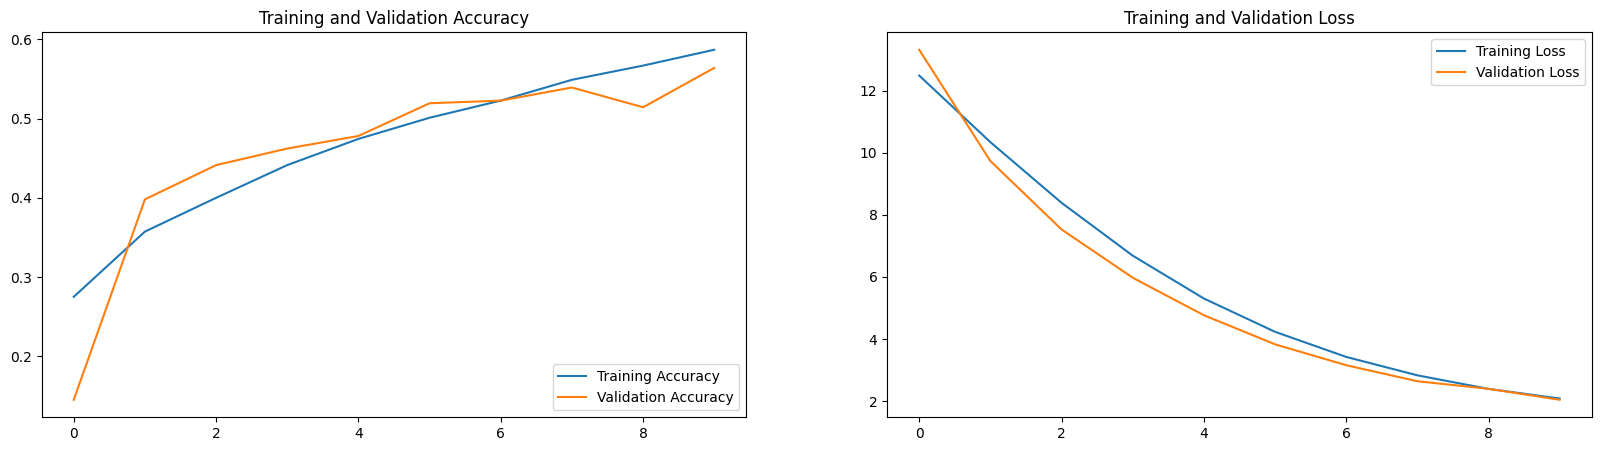

In [39]:
plot_training_history(history)

### **Model Evaluation**

In [40]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 3s 26ms/step - loss: 2.0248 - accuracy: 0.5645
final train accuracy = 65.05 , validation accuracy = 56.45


### **Plotting Confusion Matrix**

113/113 [==============================] - 2s 20ms/step


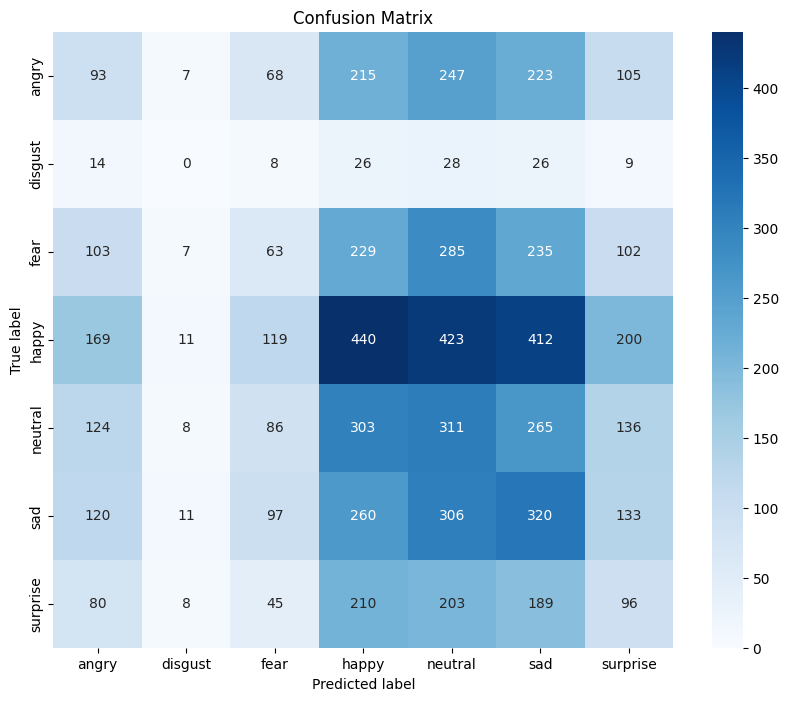

In [41]:
# Assuming your true_classes and predicted_classes are already defined
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
# Printing the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.13      0.10      0.11       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.06      0.08      1024
       happy       0.26      0.25      0.25      1774
     neutral       0.17      0.25      0.20      1233
         sad       0.19      0.26      0.22      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.18      0.18      0.18      7178



The classification report indicates that model is not performing well. Here are some key points from the report that highlight this:

1. **Low Precision, Recall, and F1-Score**:
    - The precision, recall, and F1-score values are low for all classes, suggesting that the model struggles to correctly identify the emotions.
    - For instance, the 'angry' class has a precision of 0.14 and recall of 0.18, resulting in an F1-score of 0.16. Similar poor performance is observed across other classes.

2. **Zero Scores for Certain Classes**:
    - The 'disgust' class has zero precision, recall, and F1-score, indicating that the model fails to predict this class correctly at all.

3. **Low Accuracy**:
    - The overall accuracy of the model is 17%, which is very low for a classification task.

4. **Macro and Weighted Averages**:
    - The macro average and weighted average scores are also low, which is expected given the poor individual class performance.

### **Making Predictions**

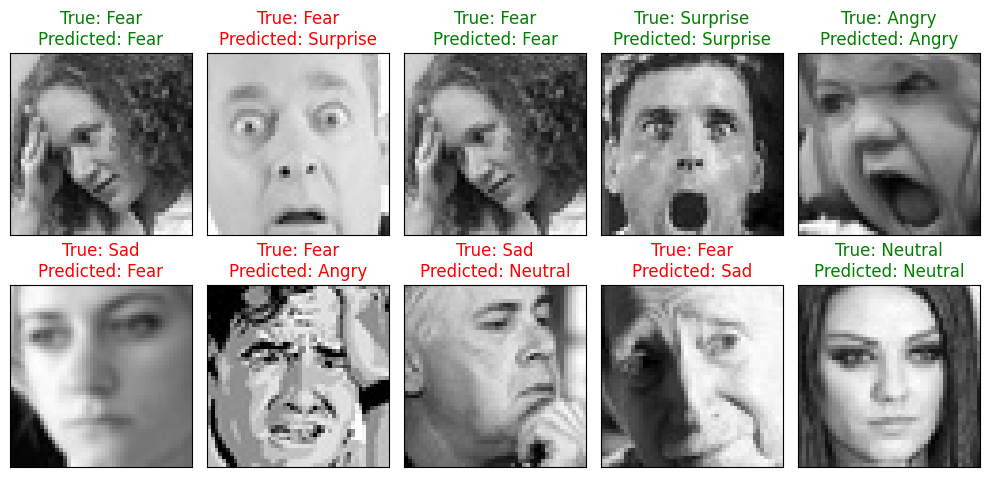

In [43]:
# Emotion classes for the dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 10)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()

## **Model 2: Image Augmentation**

Image augmentation is a technique used to artificially increase the size and diversity of a dataset by applying various transformations to the existing images. This process helps improve the robustness and generalization of machine learning models, particularly in tasks such as image classification, object detection, and image segmentation. Here are some common image augmentation techniques:

### Common Image Augmentation Techniques

1. **Geometric Transformations**:
    - **Rotation**: Rotating the image by a certain angle.
    - **Translation**: Shifting the image along the x or y axis.
    - **Scaling**: Resizing the image.
    - **Shearing**: Slanting the shape of the image.
    - **Flipping**: Mirroring the image horizontally or vertically.

2. **Color Space Transformations**:
    - **Brightness Adjustment**: Increasing or decreasing the brightness of the image.
    - **Contrast Adjustment**: Changing the contrast levels.
    - **Saturation Adjustment**: Modifying the intensity of colors.
    - **Hue Adjustment**: Changing the color tone.

3. **Noise Injection**:
    - **Adding Gaussian Noise**: Introducing random noise to the image.
    - **Adding Salt and Pepper Noise**: Adding white and black pixels randomly.

4. **Blur and Sharpen**:
    - **Gaussian Blur**: Applying a Gaussian filter to blur the image.
    - **Motion Blur**: Blurring the image to simulate the effect of movement.
    - **Sharpening**: Enhancing the edges to make the image clearer.

5. **Cropping and Padding**:
    - **Random Cropping**: Randomly cutting out a portion of the image.
    - **Center Cropping**: Cutting out the central part of the image.
    - **Padding**: Adding borders to the image to change its dimensions.

6. **Affine Transformations**:
    - **Affine Transform**: Applying a linear transformation that preserves points, straight lines, and planes.

7. **Elastic Transformations**:
    - **Elastic Deformation**: Applying random elastic distortions to the image, often used in handwriting and character recognition tasks.

### Benefits of Image Augmentation

1. **Improves Model Generalization**:
    - By exposing the model to varied versions of the same images, it learns to generalize better and becomes less sensitive to specific image characteristics.

2. **Reduces Overfitting**:
    - Augmentation increases the diversity of the training set, which helps prevent the model from memorizing the training data and overfitting.

3. **Makes Models Robust to Real-World Variations**:
    - Models trained with augmented data are more robust to variations in the real world, such as changes in lighting, orientation, and noise.

In [44]:
# Define paths to the train and validation directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'
# validation_data_dir = '/content/emotion_detection_project/datasets/raw/test'

# Set some parameters
img_width, img_height = 48, 48  # Size of images
batch_size = 64
epochs = 10
num_classes = 7  # Update this based on the number of your classes


# Initializing the ImageDataGenerator with data augmentation options for the training set
data_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values from [0, 255] to [0, 1]
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Range (as a fraction of total width) for random horizontal shifts
    height_shift_range=0.2,  # Range (as a fraction of total height) for random vertical shifts
    shear_range=0.2,  # Shearing intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    fill_mode='nearest',  # Strategy to fill newly created pixels, which can appear after a rotation or a width/height shift
    validation_split=0.2  # Set the validation split; 20% of the data will be used for validation
)

test_data_generator = ImageDataGenerator(rescale=1./255)


# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training')

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation')

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
    )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


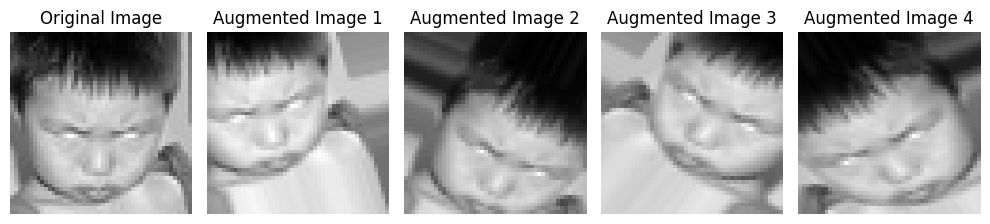

In [45]:
# Path to your specific image
image_path = '/content/train/angry/Training_10118481.jpg'

# Load and convert the image to an array
img = load_img(image_path, color_mode='grayscale', target_size=(img_width, img_height))  # Adjust color_mode if necessary
img_array = img_to_array(img)  # Converts the image to a numpy array
img_array = img_array.reshape((1,) + img_array.shape)  # Reshapes the image to (1, width, height, channels) for the generator

# Setting up the plot
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
# Plot the original image first. Since img_array is a 3D array after reshaping, we use [:, :, 0]
axes[0].imshow(img_array[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Generate and plot augmented images
for i, ax in enumerate(axes.flat[1:]):  # Start from the second subplot
    # Generate a batch of augmented images
    aug_iter = data_generator.flow(img_array, batch_size=1)
    aug_img = next(aug_iter)[0]  # Get the first augmented image from the batch

    # Plot the augmented image. We directly use [:, :, 0] without an initial batch index
    ax.imshow(aug_img[:, :, 0], cmap='gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Same CNN Model as above

In [46]:
# Assuming img_width, img_height, and classes are defined. For example:
img_width, img_height = 48, 48
classes = 7

#Initialising the CNN
model = tf.keras.models.Sequential()

# Adding convolutional layers with activations on separate lines
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(img_width, img_height, 1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(tf.keras.layers.Activation('softmax'))

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# File path for the model checkpoint
cnn_path = '/content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation'
name = 'Custom_CNN_augmented_model.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps_epoch,
    callbacks=callbacks)

Epoch 1/100
359/359 [==============================] - ETA: 0s - loss: 12.4597 - accuracy: 0.2187
Epoch 1: val_loss improved from inf to 14.74409, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 [==============================] - 34s 86ms/step - loss: 12.4597 - accuracy: 0.2187 - val_loss: 14.7441 - val_accuracy: 0.1151 - lr: 1.0000e-04
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 10.2127 - accuracy: 0.2427
Epoch 2: val_loss improved from 14.74409 to 9.77443, saving model to /content/FER_2013_Emotion_Detection/Custom_CNN_With_Augmentation/Custom_CNN_augmented_model.keras
359/359 [==============================] - 29s 82ms/step - loss: 10.2127 - accuracy: 0.2427 - val_loss: 9.7744 - val_accuracy: 0.2203 - lr: 1.0000e-04
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 8.1085 - accuracy: 0.2490
Epoch 3: val_loss improved from 9.77443 to 7.33852, saving model to /conte

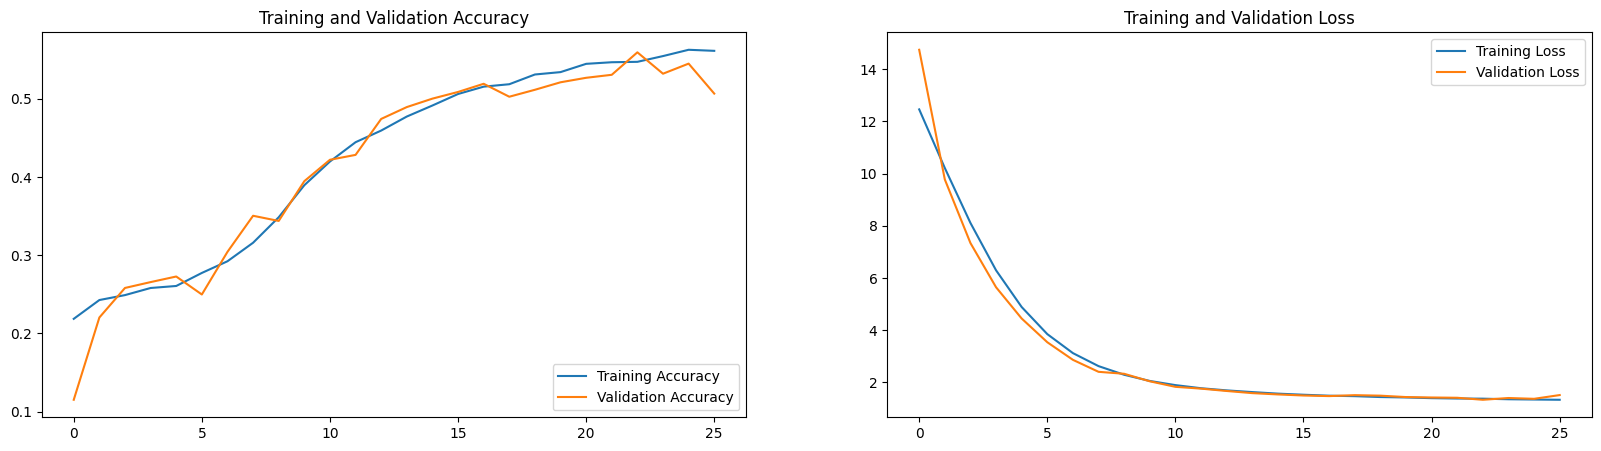

In [47]:
plot_training_history(history)

In [48]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 3s 30ms/step - loss: 1.2342 - accuracy: 0.5915
final train accuracy = 58.03 , validation accuracy = 59.15


113/113 [==============================] - 3s 21ms/step


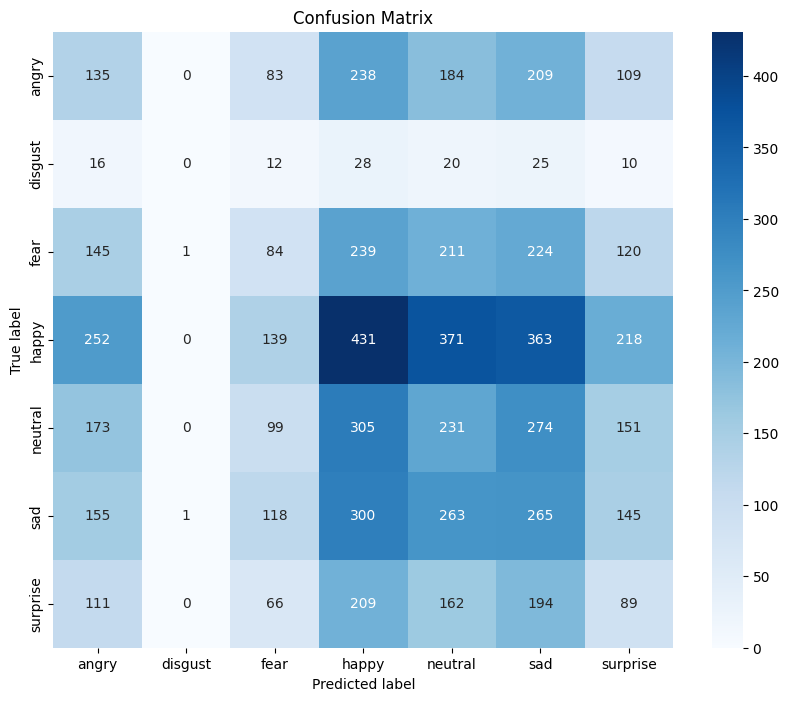

In [49]:
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.14      0.14      0.14       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.08      0.10      1024
       happy       0.25      0.24      0.24      1774
     neutral       0.16      0.19      0.17      1233
         sad       0.17      0.21      0.19      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



## **Model 3: Transfer Learning VGGNET**

Transfer learning is a technique in machine learning where a pre-trained model is used as the starting point for a new task. This is particularly useful in deep learning where models like VGGNet, which have been trained on large datasets, can be repurposed for other tasks with less data or different domains.

### VGGNet Overview

VGGNet is a convolutional neural network architecture proposed by the Visual Geometry Group (VGG) at the University of Oxford. There are different versions, with VGG16 and VGG19 being the most commonly used. These models are known for their simplicity and depth:
- **VGG16**: Contains 16 layers (13 convolutional layers and 3 fully connected layers).
- **VGG19**: Contains 19 layers (16 convolutional layers and 3 fully connected layers).

### Transfer Learning with VGGNet

Transfer learning with VGGNet involves taking a pre-trained VGG model (trained on a large dataset like ImageNet) and adapting it to a new task. This can be done in several ways:

1. **Feature Extraction**:
    - Use the pre-trained model as a fixed feature extractor. Remove the fully connected layers at the end and replace them with new layers that are trained on your specific dataset.

2. **Fine-Tuning**:
    - Unfreeze some of the top layers of the pre-trained model and jointly train both the newly added layers and the pre-trained layers. This allows the model to adapt to the new task more effectively.

### Benefits of Transfer Learning with VGGNet

1. **Reduced Training Time**: Since the model is already pre-trained, it requires less time to converge on the new task.
2. **Improved Performance**: Pre-trained models have learned useful features from large datasets, which can improve performance on tasks with limited data.
3. **Less Data Requirement**: Transfer learning is particularly useful when you have a small dataset, as the pre-trained model already has a strong feature extraction capability.

By using transfer learning with VGGNet, you can leverage the powerful feature extraction capabilities of a model trained on a large and diverse dataset, adapting it to your specific needs efficiently.

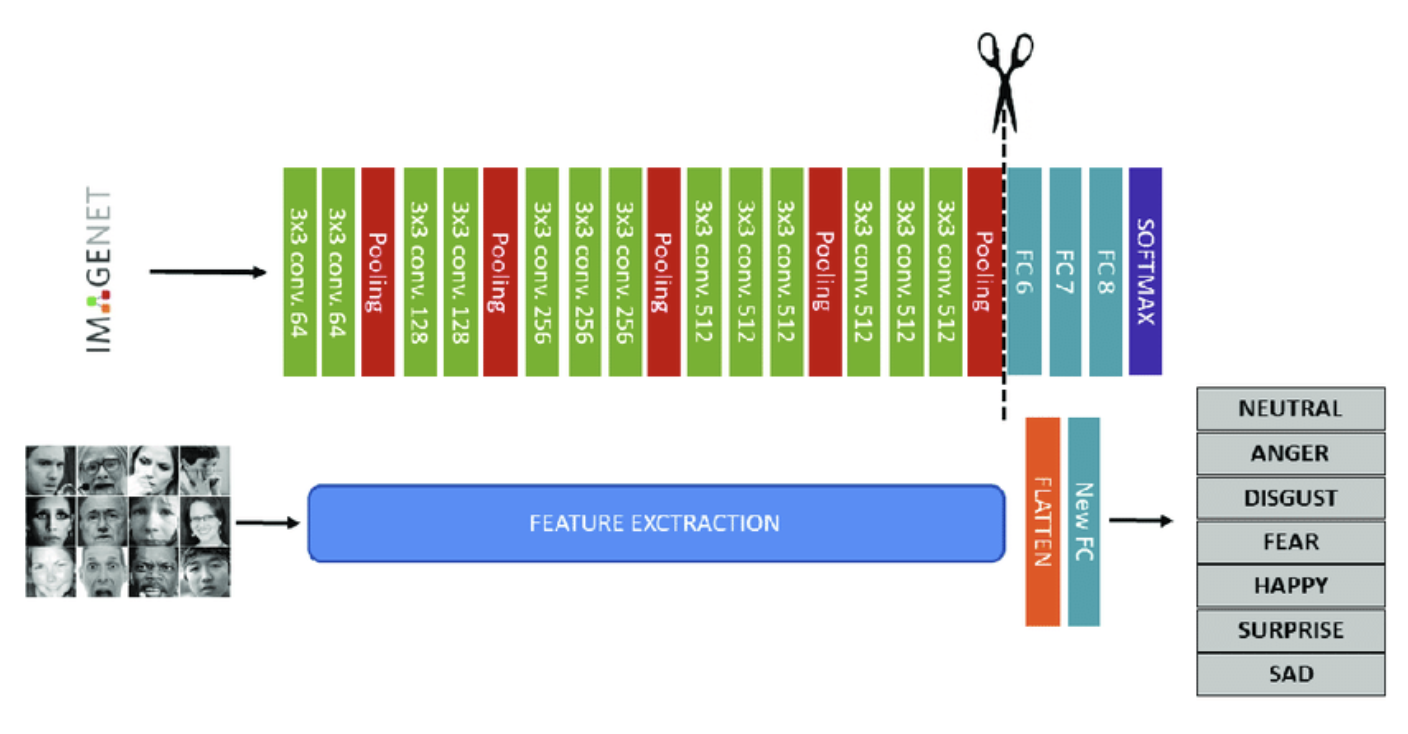

In [51]:
# Define paths to the train and validation directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'

# validation_data_dir = '/content/emotion_detection_project/datasets/raw/test'

# Set some parameters
img_width, img_height = 224, 224  # Size of images
batch_size = 64
epochs = 10
num_classes = 7  # Update this based on the number of your classes

# Rescale the pixel values (0-255) to the [0, 1] interval
data_generator = ImageDataGenerator(
                                rescale = 1 / 255.,
                                rotation_range=10,
                                zoom_range=0.2,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                # validation_split=0.2
                                )

test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

# Automatically retrieve images and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
                                train_data_dir,
                                target_size=(img_width, img_height),
                                batch_size=batch_size,
                                class_mode='categorical',
                                color_mode='rgb',
                                subset='training',
                                shuffle = True)

test_generator = test_preprocessor.flow_from_directory(
                                test_data_dir,
                                target_size=(img_width, img_height),
                                batch_size=batch_size,
                                class_mode='categorical',
                                color_mode='rgb',)
                                # subset='validation')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [52]:
classes = 7

# Clear the previous TensorFlow sessionx
tf.keras.backend.clear_session()

# Load the VGG16 base model, excluding its top (fully connected) layers
vgg = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
vgg.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [53]:
# Make the specified layers non-trainable
for layer in vgg.layers[:-3]:
    layer.trainable = False

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
# Flattening the layer and adding custom Dense layers
x = Flatten()(vgg.output)

# Adding a fully connected layer with ReLU activation and He normal initializer
x = Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization

x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization

# Adding the output layer with softmax activation
# Note: Adjust the number of units to match the number of classes you have
output = Dense(classes, activation='softmax', kernel_initializer='he_normal')(x)

# Creating the model
model = Model(inputs=vgg.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])

# Model summary to see all layers
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [55]:
# File path for the model checkpoint
cnn_path = '/content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning'
name = 'VGG16_Transfer_Learning.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
# validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [56]:
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=test_generator,
                    validation_steps=test_steps_epoch,
                    epochs=5,
                    callbacks = callbacks)

Epoch 1/5
449/449 [==============================] - ETA: 0s - loss: 1.5818 - accuracy: 0.3790
Epoch 1: val_loss improved from inf to 1.33297, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
449/449 [==============================] - 448s 966ms/step - loss: 1.5818 - accuracy: 0.3790 - val_loss: 1.3330 - val_accuracy: 0.5042 - lr: 1.0000e-04
Epoch 2/5
449/449 [==============================] - ETA: 0s - loss: 1.3596 - accuracy: 0.4823
Epoch 2: val_loss improved from 1.33297 to 1.32865, saving model to /content/FER_2013_Emotion_Detection/VGG16_Transfer_Learning/VGG16_Transfer_Learning.keras
449/449 [==============================] - 420s 933ms/step - loss: 1.3596 - accuracy: 0.4823 - val_loss: 1.3286 - val_accuracy: 0.4797 - lr: 1.0000e-04
Epoch 3/5
449/449 [==============================] - ETA: 0s - loss: 1.2830 - accuracy: 0.5133
Epoch 3: val_loss improved from 1.32865 to 1.19889, saving model to /content/FER_2013_Emotion_Detec

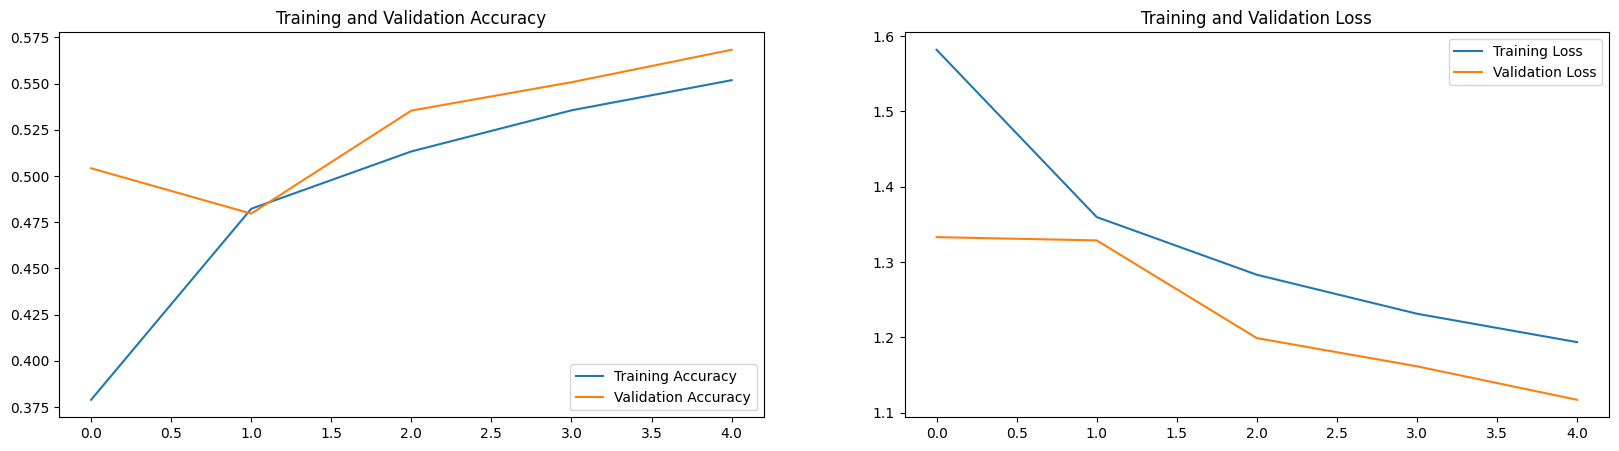

In [58]:
plot_training_history(history)

In [59]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 31s 271ms/step - loss: 1.1170 - accuracy: 0.5683
final train accuracy = 58.04 , validation accuracy = 56.83


113/113 [==============================] - 29s 258ms/step


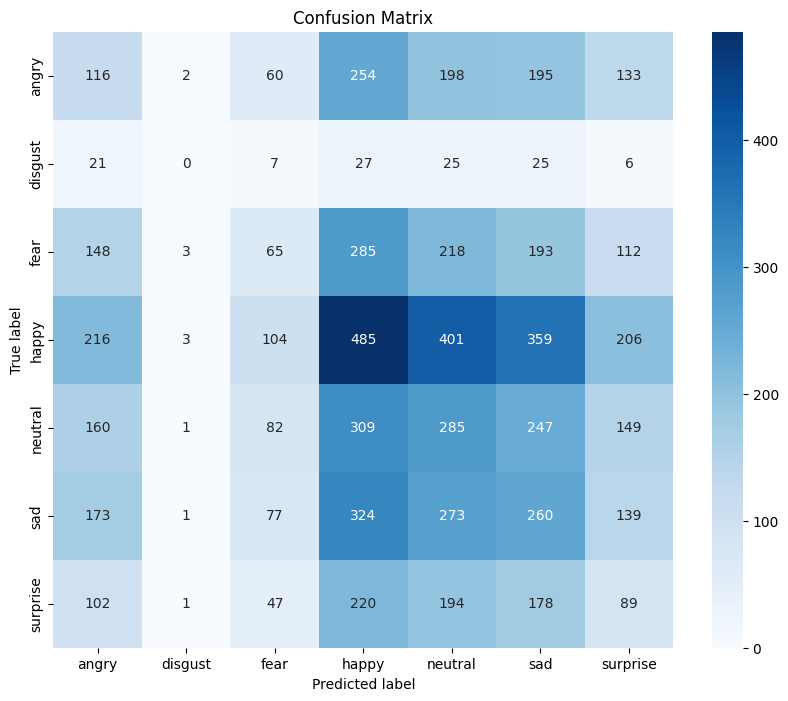

In [60]:
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.12      0.12      0.12       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.06      0.09      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.18      0.23      0.20      1233
         sad       0.18      0.21      0.19      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



## **Model 4 : Transfer Learning - ResNet50**

ResNet50 is a deep convolutional neural network architecture that is part of the Residual Networks (ResNet) family. It was introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2015 paper "Deep Residual Learning for Image Recognition." ResNet50 is known for its innovative use of residual blocks, which help to train very deep networks by addressing the vanishing gradient problem.

![Architecture](https://miro.medium.com/v2/resize:fit:828/format:webp/1*C8jf92MeHZnxnbpMkz6jkQ.png)

Transfer learning with ResNet50 follows a similar approach to using VGGNet, but with ResNet50, a different architecture that is known for its deep residual networks. ResNet50, in particular, is a 50-layer deep convolutional neural network that has shown excellent performance on various tasks.

### **Data Augmentation and Data Generators**

This code configures data augmentation for training and rescaling for testing/validation datasets. It uses the `ImageDataGenerator` class from Keras to preprocess image data.

- **Training Data Augmentation:**
  - Rescales pixel values to the range [0, 1].
  - Applies random rotations, shifts, shearing, zoom, and horizontal flips to augment the training data.
  - Ensures the newly created pixels are filled using the nearest pixel strategy.

- **Validation/Test Data Rescaling:**
  - Rescales pixel values to the range [0, 1] without further augmentation.

- **Data Generators:**
  - **Training Generator:**
    - Loads images from the specified training directory.
    - Resizes images to 224x224 pixels and converts them to RGB.
    - Prepares the data for multi-class classification with a batch size of 32.
  - **Testing/Validation Generator:**
    - Loads images from the specified testing directory.
    - Resizes images to 224x224 pixels and converts them to RGB.
    - Prepares the data for multi-class classification with a batch size of 32.

In [62]:
train_dir = '/content/train'
test_dir = '/content/test'

# Data augmentation configuration for training data
train_datagen = ImageDataGenerator(rescale=1/255,                # Rescale pixel values to [0, 1]
                                  rotation_range=40,            # Randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range=0.2,        # Randomly horizontally shift images
                                  height_shift_range=0.2,       # Randomly vertically shift images
                                  shear_range=0.2,              # Apply shearing transformations
                                  zoom_range=0.1,               # Randomly zoom image
                                  horizontal_flip=True,         # Randomly flip images horizontally
                                  fill_mode='nearest'           # Strategy used for filling in newly created pixels
                                )

# Rescaling for validation/test data (without further data augmentation)
test_datagen = ImageDataGenerator(
                                  rescale=1/255                 # Rescale pixel values to [0, 1]
                              )

# Creating data generators for training
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(224, 224),       # Resize images to 224x224 for model input
                                                    color_mode='rgb',             # Images will be converted to RGB
                                                    class_mode='categorical',     # For multi-class classification
                                                    batch_size=32                 # Size of the batches of data
                                                )

# Creating data generators for testing/validation
test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size=(224, 224),       # Resize images to 224x224 for model input
                                                  color_mode='rgb',             # Images will be converted to RGB
                                                  class_mode='categorical',     # For multi-class classification
                                                  batch_size=32                 # Size of the batches of data
                                              )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### **Introducing Class wieghts for imbalanced data**

#### Computing Class Weights

This code calculates class weights to handle class imbalances in the training data, ensuring that the model gives more attention to underrepresented classes.

- **Extract Class Labels:**
  - Retrieves the class labels for all instances in the training dataset from the `train_generator`.

- **Compute Class Weights:**
  - Uses the `compute_class_weight` function to automatically adjust weights inversely proportional to class frequencies using the 'balanced' strategy.
  - Takes the unique class labels and the class labels for each instance as inputs.

- **Create Class Weights Dictionary:**
  - Maps class indices to their corresponding calculated weights, creating a dictionary.

- **Output:**
  - Prints the class weights dictionary to display the weights assigned to each class.

In [63]:
# Extract class labels for all instances in the training dataset
classes = np.array(train_generator.classes)

# Calculate class weights to handle imbalances in the training data
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
class_weights = compute_class_weight(
    class_weight='balanced',  # Strategy to balance classes
    classes=np.unique(classes),  # Unique class labels
    y=classes  # Class labels for each instance in the training dataset
)

# Create a dictionary mapping class indices to their calculated weights
class_weights_dict = dict(enumerate(class_weights))

# Output the class weights dictionary
print("Class Weights Dictionary:", class_weights_dict)

Class Weights Dictionary: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


### **Transfer Learning Model with ResNet50V2**

This code sets up a transfer learning model using ResNet50V2 as the base, followed by additional layers for classification.

- **Input Shape:**
  - Defines the shape of input images as 224x224 pixels with 3 color channels (RGB).

- **Base Model:**
  - Loads ResNet50V2 without the top classification layer (`include_top=False`), pre-trained on ImageNet weights, and specifies the input shape.

- **Model Architecture:**
  - **Base Model:** ResNet50V2 for feature extraction.
  - **BatchNormalization:** Normalizes activations from the base model.
  - **GlobalAveragePooling2D:** Reduces each feature map to a single value by averaging, reducing dimensionality.
  - **Dense Layers:** Adds fully connected layers with ReLU activation for classification.
    - 512 neurons with 10% dropout.
    - 256 neurons with 10% dropout.
    - 128 neurons with 10% dropout.
  - **Output Layer:** 7 neurons with softmax activation for multi-class classification (7 classes).

- **Optimizer:**
  - Uses the Adamax optimizer with a learning rate of 0.0001.

- **Compile the Model:**
  - Uses categorical cross-entropy as the loss function.
  - Tracks accuracy as a performance metric.

- **Model Summary:**
  - Displays the architecture and parameters of the compiled model.

In [64]:
input_shape = (224, 224, 3)

base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=input_shape)

model = Sequential([
                    base_model,
                    BatchNormalization(),
                    GlobalAveragePooling2D(),
                    Dense(512, activation='relu'),
                    Dropout(0.1),
                    Dense(256, activation='relu'),
                    Dropout(0.1),
                    Dense(128, activation='relu'),
                    Dropout(0.1),
                    Dense(7, activation='softmax')
                  ])

optimizer = Adamax(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94668760/94668760 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                         

### **Model Training Callbacks Configuration**

This code configures several callbacks for training a neural network, enhancing model performance and management.

- **Model Checkpoint:**
  - Saves the best model based on validation loss to a specified path.

- **Early Stopping:**
  - Stops training if the validation loss doesn't improve for a specified number of epochs, restoring the best weights.

- **Reduce Learning Rate on Plateau:**
  - Reduces the learning rate when the validation loss plateaus, improving convergence.

- **CSV Logger:**
  - Logs training data to a CSV file for analysis.

- **Steps Per Epoch:**
  - Calculates the number of steps per epoch for training and testing based on the generator's batch size and sample count.

In [65]:
# File path for the model checkpoint
cnn_path = '/content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning'
name = 'ResNet50_Transfer_Learning.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=6,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
# validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

### **Model Training**

This code trains the neural network model with specified configurations.

- **Training Data:**
  - Uses `train_generator` for the training data.

- **Steps Per Epoch:**
  - Specifies 200 steps per epoch.

- **Epochs:**
  - Sets the training to run for 50 epochs.

- **Validation Data:**
  - Uses `test_generator` for validation data.

- **Validation Steps:**
  - Specifies 100 validation steps per epoch.

- **Class Weights:**
  - Applies class weights to handle class imbalances using `class_weights_dict`.

- **Callbacks:**
  - Utilizes a list of callbacks to save checkpoints, stop early, reduce learning rate, and log training data.

In [66]:
train_history = model.fit(
                          train_generator,
                          steps_per_epoch=200,
                          epochs=50,
                          validation_data=test_generator,
                          validation_steps=100,
                          class_weight=class_weights_dict,
                          callbacks = callbacks
                        )

Epoch 1/50
200/200 [==============================] - ETA: 0s - loss: 1.9128 - accuracy: 0.2151
Epoch 1: val_loss improved from inf to 1.80732, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
200/200 [==============================] - 182s 740ms/step - loss: 1.9128 - accuracy: 0.2151 - val_loss: 1.8073 - val_accuracy: 0.2850
Epoch 2/50
200/200 [==============================] - ETA: 0s - loss: 1.8190 - accuracy: 0.2811
Epoch 2: val_loss improved from 1.80732 to 1.72763, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Transfer_Learning/ResNet50_Transfer_Learning.keras
200/200 [==============================] - 130s 649ms/step - loss: 1.8190 - accuracy: 0.2811 - val_loss: 1.7276 - val_accuracy: 0.3328
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 1.7747 - accuracy: 0.3386
Epoch 3: val_loss improved from 1.72763 to 1.62296, saving model to /content/FER_2013_Emotion_Detection/ResNet50_Trans

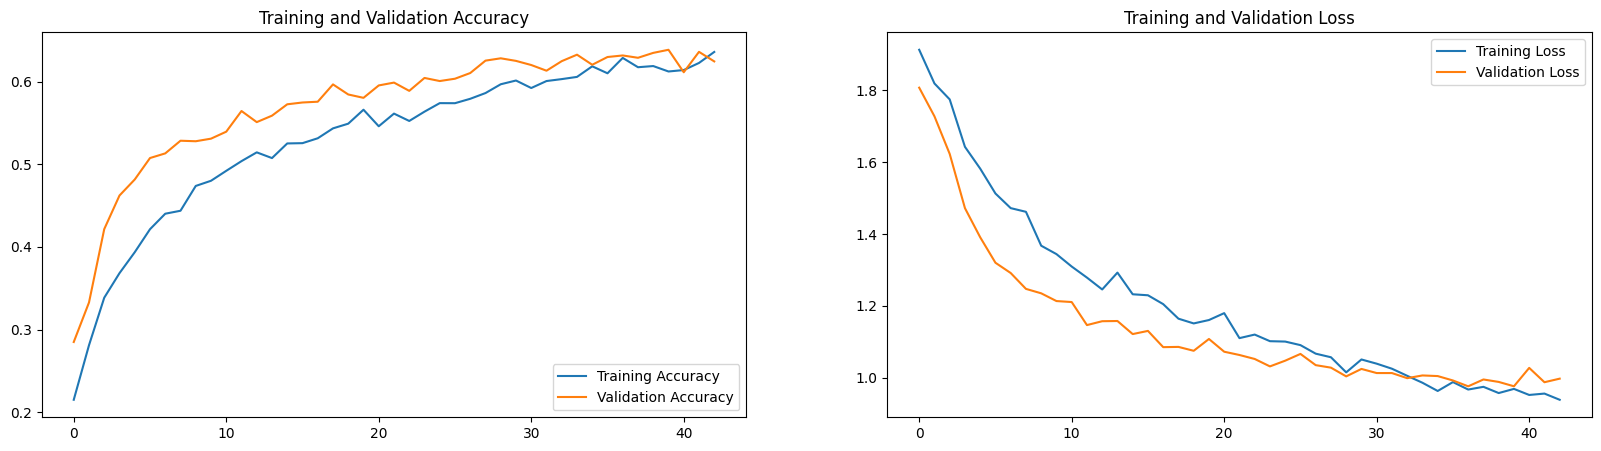

In [67]:
plot_training_history(train_history)

In [ ]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

196/898 [=====>........................] - ETA: 5:37 - loss: 0.9302 - accuracy: 0.6452

225/225 [==============================] - 21s 91ms/step


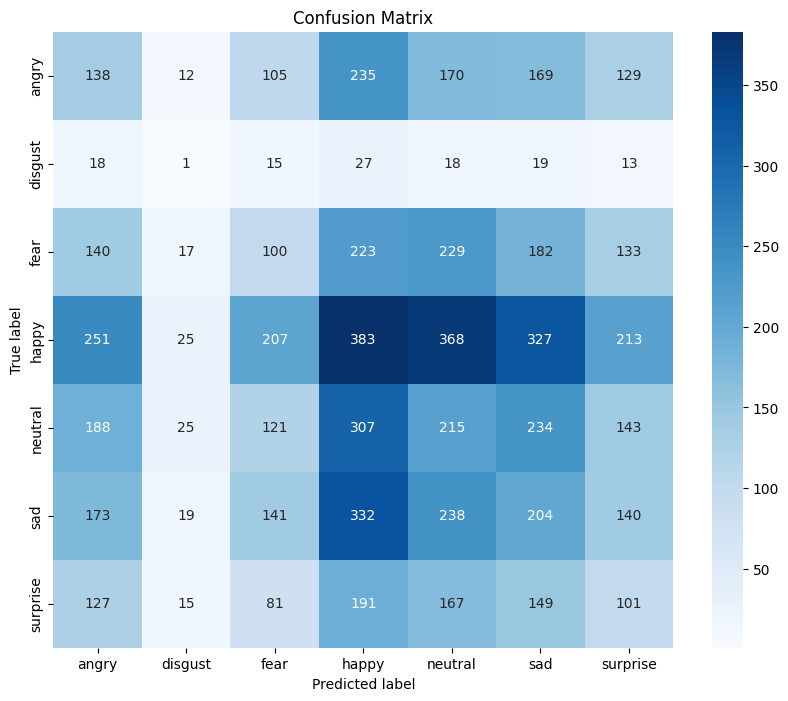

In [68]:
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size)), axis=1)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
# Printing the classification report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.13      0.14      0.14       958
     disgust       0.01      0.01      0.01       111
        fear       0.13      0.10      0.11      1024
       happy       0.23      0.22      0.22      1774
     neutral       0.15      0.17      0.16      1233
         sad       0.16      0.16      0.16      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.16      7178
   macro avg       0.13      0.13      0.13      7178
weighted avg       0.16      0.16      0.16      7178



### **AUC ROC plot for each class**

In [70]:
true_labels = test_generator.classes
preds = model.predict(test_generator, steps=len(test_generator))
pred_labels = np.argmax(preds, axis=1)
classes=list(test_generator.class_indices.keys())

225/225 [==============================] - 19s 86ms/step


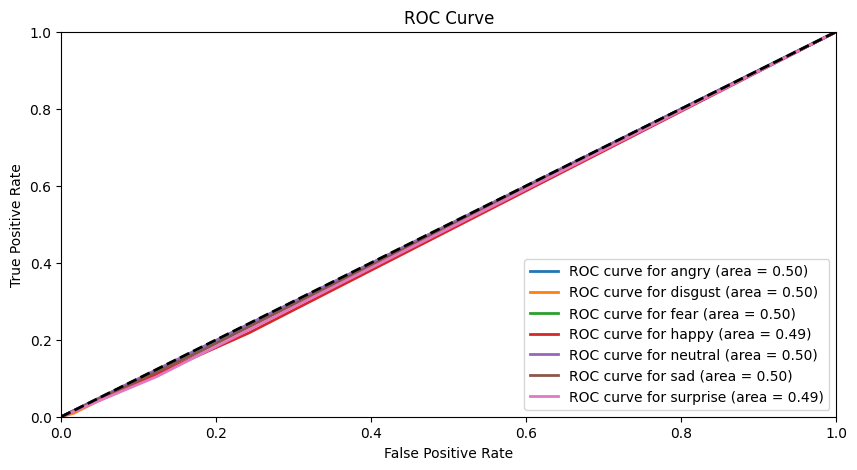

In [71]:
y_encoded = pd.get_dummies(true_labels).astype(int).values
preds_encoded = pd.get_dummies(pred_labels).astype(int).values

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:,i], preds_encoded[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve for {classes[i]} (area = {roc_auc[i]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

In [72]:
model.save("ResNet_Model_V2.keras")

## **Push all your models into Drive for easy access.**